In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
key="1c8bf9f7f1496a6160903ca865b799f49ce9f463"

In [104]:
start='2010-01-01'
end='2021-12-6'

In [105]:
df = pdr.DataReader('AAPL','yahoo',start,end)

In [106]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553024
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [107]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-30,165.520004,159.919998,159.990005,165.300003,174048100.0,165.300003
2021-12-01,170.300003,164.529999,167.479996,164.770004,152052500.0,164.770004
2021-12-02,164.199997,157.800003,158.740005,163.759995,136739200.0,163.759995
2021-12-03,164.960007,159.720001,164.020004,161.839996,117938300.0,161.839996
2021-12-06,167.880005,164.279999,164.289993,165.320007,107407600.0,165.320007


In [108]:
df=df.reset_index()

In [109]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553024
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [110]:
df=df.drop(['Date', 'Adj Close'], axis=1)

In [111]:
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


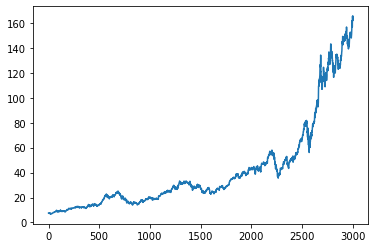

In [112]:
plt.plot(df.Close)

In [113]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2999,165.520004,159.919998,159.990005,165.300003,174048100.0
3000,170.300003,164.529999,167.479996,164.770004,152052500.0
3001,164.199997,157.800003,158.740005,163.759995,136739200.0
3002,164.960007,159.720001,164.020004,161.839996,117938300.0


In [114]:
mean100=df.Close.rolling(100).mean()
mean100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2999    148.6631
3000    148.8658
3001    149.0470
3002    149.1739
3003    149.3423
Name: Close, Length: 3004, dtype: float64

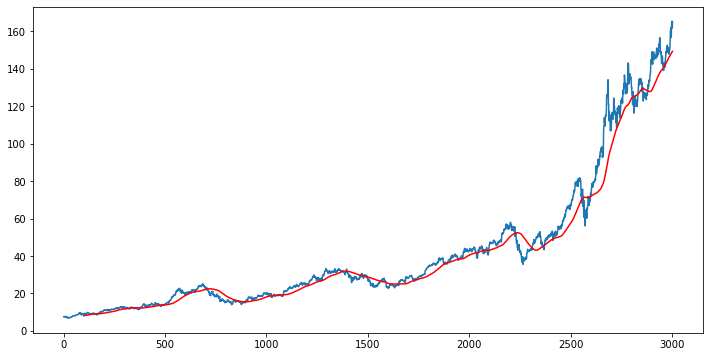

In [115]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(mean100,'r')

In [116]:
mean200=df.Close.rolling(200).mean()
mean200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2999    138.47120
3000    138.64085
3001    138.81110
3002    138.97095
3003    139.16755
Name: Close, Length: 3004, dtype: float64

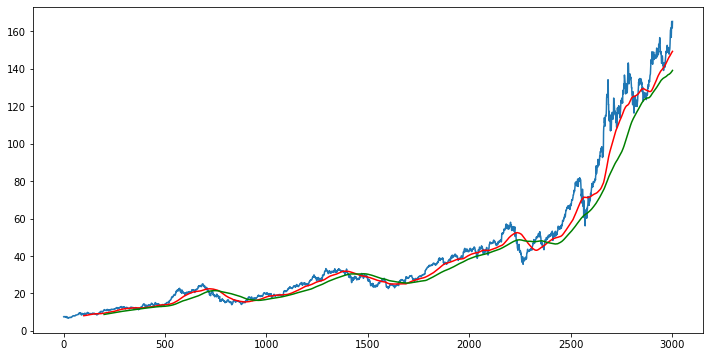

In [117]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(mean100,'r')
plt.plot(mean200,'g')

In [118]:
#Training n testing data
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.75)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.75):])

print(data_training.shape)
print(data_testing.shape)

(2253, 1)
(751, 1)


In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [120]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01304067],
       [0.01533047],
       [0.01558878],
       ...,
       [0.69472369],
       [0.68998352],
       [0.69228031]])

In [121]:
x_train=[]
y_train=[]

time_step=100

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-time_step:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train=np.array(x_train), np.array(y_train)

In [122]:
 #Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [123]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(time_step,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [124]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_17 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_19 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_18 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_20 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_19 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_21 (LSTM)              (None, 120)              

In [125]:
model.compile(optimizer='adam', loss="mean_squared_error")
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
68/68 [==============================] - 13s 145ms/step - loss: 0.0331
Epoch 2/50
68/68 [==============================] - 11s 160ms/step - loss: 0.0071
Epoch 3/50
68/68 [==============================] - 11s 162ms/step - loss: 0.0070
Epoch 4/50
68/68 [==============================] - 9s 138ms/step - loss: 0.0058
Epoch 5/50
68/68 [==============================] - 10s 144ms/step - loss: 0.0053
Epoch 6/50
68/68 [==============================] - 15s 229ms/step - loss: 0.0052
Epoch 7/50
68/68 [==============================] - 11s 156ms/step - loss: 0.0049
Epoch 8/50
68/68 [==============================] - 12s 174ms/step - loss: 0.0043
Epoch 9/50
68/68 [==============================] - 10s 154ms/step - loss: 0.0042
Epoch 10/50
68/68 [==============================] - 12s 171ms/step - loss: 0.0039
Epoch 11/50
68/68 [==============================] - 11s 168ms/step - loss: 0.0034
Epoch 12/50
68/68 [==============================] - 11s 159ms/step - loss: 0.0034
Epoch 13/50
68

In [126]:
model.save('LSTM_model.h5')

In [127]:
data_testing.head()

,Close
2253,42.737499
2254,41.369999
2255,40.985001
2256,41.517502
2257,40.222500


In [128]:
past_100_days=data_training.tail(100)

In [129]:
final_df=past_100_days.append(data_testing, ignore_index=True)

In [130]:
final_df.head()

,Close
0,47.902500
1,48.250000
2,48.705002
3,48.552502
4,47.744999


In [131]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.09520506],
       [0.09788282],
       [0.10138897],
       [0.10021384],
       [0.09399139],
       [0.09193011],
       [0.09266214],
       [0.11425763],
       [0.12560441],
       [0.12676029],
       [0.12884086],
       [0.12506501],
       [0.12533471],
       [0.12847483],
       [0.12587411],
       [0.12845555],
       [0.13015083],
       [0.1310948 ],
       [0.13702826],
       [0.14523492],
       [0.14115086],
       [0.14034173],
       [0.14036101],
       [0.14120865],
       [0.14249937],
       [0.14592844],
       [0.14931898],
       [0.15563773],
       [0.15958695],
       [0.16459573],
       [0.16600203],
       [0.16313161],
       [0.15586892],
       [0.15240131],
       [0.14667976],
       [0.15731376],
       [0.15195824],
       [0.16224546],
       [0.15729448],
       [0.14581286],
       [0.14650638],
       [0.1467568 ],
       [0.14995471],
       [0.14538904],
       [0.1514188 ],
       [0.15411585],
       [0.15070603],
       [0.159

In [132]:
input_data.shape

(851, 1)

In [133]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-time_step:i])
    y_test.append(input_data[i,0])
    
x_test, y_test=np.array(x_test), np.array(y_test)

In [134]:
print(x_test.shape)
print(y_test.shape)

(751, 100, 1)
(751,)


In [136]:
#making prediction


y_predicted=model.predict(x_test)

In [137]:
y_predicted.shape

(751, 1)

In [138]:
y_test

array([0.05540464, 0.04486696, 0.04190025, 0.04600359, 0.03602457,
       0.0282032 , 0.01645185, 0.00893872, 0.02885818, 0.0268932 ,
       0.02704732, 0.02995627, 0.03030302, 0.        , 0.01169352,
       0.01105779, 0.01649039, 0.02142209, 0.02236606, 0.01945711,
       0.01504556, 0.02095976, 0.02456221, 0.02633454, 0.02818395,
       0.02140284, 0.02259723, 0.02024696, 0.02999478, 0.02718218,
       0.02406132, 0.04442389, 0.04671637, 0.04687049, 0.05598258,
       0.06162706, 0.06174267, 0.05538538, 0.05436437, 0.05247643,
       0.05528905, 0.05392126, 0.05511568, 0.05438362, 0.0553661 ,
       0.0574852 , 0.05561655, 0.05929607, 0.06172338, 0.06191604,
       0.06295631, 0.05964282, 0.06314897, 0.06484425, 0.06422777,
       0.06228207, 0.05839064, 0.05918049, 0.07071989, 0.07459207,
       0.07613324, 0.08002464, 0.08462885, 0.08828912, 0.0854187 ,
       0.08855882, 0.10190909, 0.09412626, 0.08967617, 0.08591957,
       0.08915602, 0.08963763, 0.09200715, 0.09449229, 0.09984

In [139]:
y_predicted

array([[0.13446823],
       [0.13275242],
       [0.13107519],
       [0.12941706],
       [0.12778057],
       [0.12615407],
       [0.12451032],
       [0.12280709],
       [0.12100254],
       [0.11912349],
       [0.11722404],
       [0.11535174],
       [0.11355326],
       [0.11186549],
       [0.11025599],
       [0.10868981],
       [0.10716578],
       [0.10569309],
       [0.10429853],
       [0.10300791],
       [0.10183334],
       [0.10076918],
       [0.09980837],
       [0.09895745],
       [0.09822237],
       [0.09760633],
       [0.09710234],
       [0.09668729],
       [0.09634408],
       [0.09605968],
       [0.0958409 ],
       [0.09567657],
       [0.09556885],
       [0.09555975],
       [0.09566666],
       [0.09590021],
       [0.0962853 ],
       [0.0968384 ],
       [0.09755394],
       [0.09840456],
       [0.09935752],
       [0.10037944],
       [0.10144138],
       [0.102515  ],
       [0.10357694],
       [0.10460646],
       [0.10558972],
       [0.106

In [140]:
scaler.scale_

array([0.00770579])

In [141]:
scale_factor=1/0.00770579
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

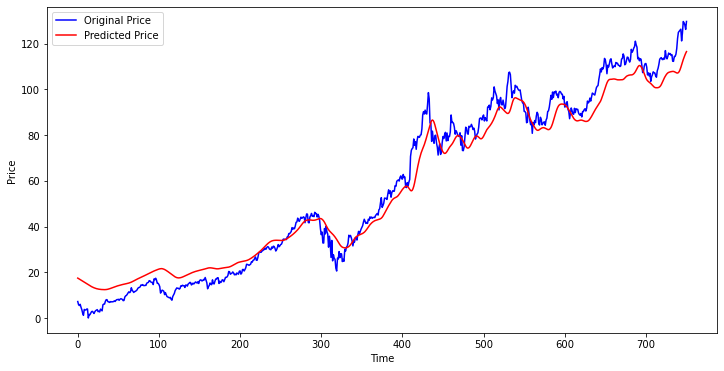

In [143]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()